<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


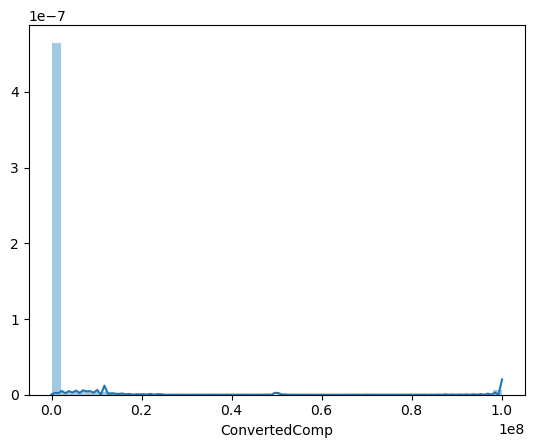

In [3]:
import pandas as pd

df['CompFreq'].dropna(inplace=True)

df['CompTotal'].dropna(inplace=True)

df['ConvertedComp'].dropna(inplace=True)

df['CompFreq'].fillna('Yearly', inplace=True)

df['CompTotal'].fillna(0, inplace=True)

df['ConvertedComp'].fillna(0, inplace=True)

def fillcomp(freq,total):

    if freq=='Yearly':

        return total

    elif freq=='Monthly':

        return total * 12

    elif freq=='Weekly':

        return total * 50

df['ConvertedComp']=df.apply(lambda row:fillcomp(row['CompFreq'], row['ConvertedComp']),axis=1)

# your code goes here

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats as stats

%matplotlib inline

import seaborn as sns

sns.distplot(df['ConvertedComp'], kde=True)

plt.show()

Plot the histogram for the column `ConvertedComp`.


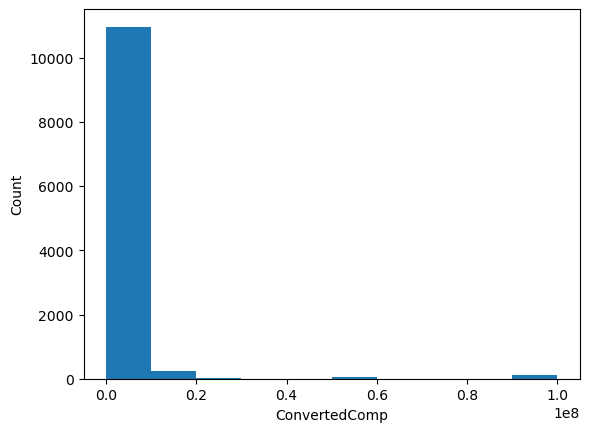

In [4]:
import matplotlib as mpl

import matplotlib.pyplot as plt

df['ConvertedComp'].plot(kind='hist')

plt.title=('Histogram of ConvertedComp')

plt.xlabel('ConvertedComp')

plt.ylabel('Count')

plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
df['ConvertedComp'].isnull().count()

df.groupby('Gender')['ConvertedComp'].median()

Gender
Man                                                            102428.0
Man;Non-binary, genderqueer, or gender non-conforming          106897.5
Non-binary, genderqueer, or gender non-conforming              100000.0
Woman                                                           91000.0
Woman;Man                                                       60480.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming     60208.0
Woman;Non-binary, genderqueer, or gender non-conforming        114058.5
Name: ConvertedComp, dtype: float64

How many responders identified themselves only as a **Man**?


In [6]:
print(df['Gender'].tolist().count('Man'))

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
df2=df.loc[df['Gender']=='Woman']

df2.groupby('Gender')['ConvertedComp'].median()

Gender
Woman    91000.0
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
df['Age'].describe().loc[['min','25%','mean','75%','max']]

min     16.000000
25%     25.000000
mean    30.778895
75%     35.000000
max     99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


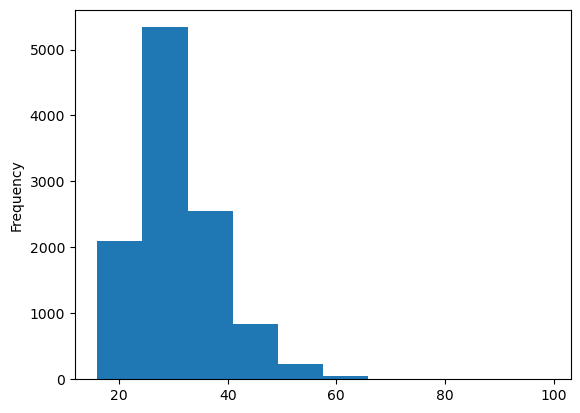

In [9]:
import matplotlib as mpl

import matplotlib.pyplot as plt

df['Age'].plot(kind='hist')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

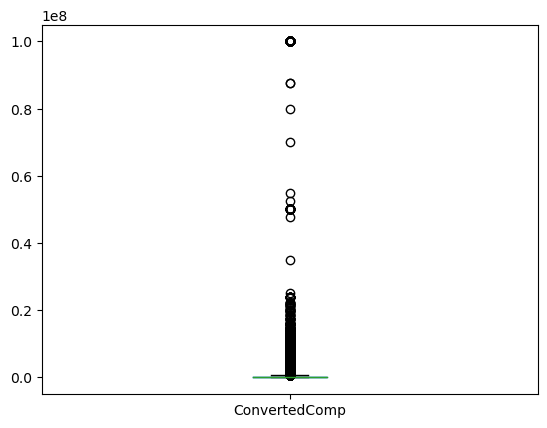

In [10]:
df.boxplot(column =['ConvertedComp'],grid=False)   

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
Q1 = df['ConvertedComp'].quantile(0.25)

Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1

IQR

222691.0

Find out the upper and lower bounds.


In [12]:
q1 = df['ConvertedComp'].quantile(0.25)

q3 = df['ConvertedComp'].quantile(0.75)

iqr = q3 - q1

print('iqr valu is: ',iqr)


lower_limit = q1 - 1.5 * iqr

upper_limit = q3 + 1.5 * iqr


print('lower bounds: ' + str(lower_limit))

print('upper bounds: ' + str(upper_limit))

iqr valu is:  222691.0
lower bounds: -279239.5
upper bounds: 611524.5


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
print(((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))).sum())  

1525


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [16]:
df2=df[(df['ConvertedComp'] > (Q1 - 1.5 * IQR)) & (df['ConvertedComp'] < (Q3 + 1.5 * IQR))]  

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.012882,-0.002585,-0.015314,0.004621,0.004041
CompTotal,-0.012882,1.000000,-0.003118,0.003393,0.005502,0.007303
ConvertedComp,-0.002585,-0.003118,1.000000,0.004808,-0.021867,0.020662
WorkWeekHrs,-0.015314,0.003393,0.004808,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.005502,-0.021867,0.026517,1.000000,-0.020469
Age,0.004041,0.007303,0.020662,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
